There are  4 potential algorithms for balancing exploration and exploitation in the stochastic multi-armed bandit problem: 

1) Explore first greedy (it explores for the  first N time steps, and then exploits)
2) Epsilon greedy 
3) Upper COnfidence Bound (UCB)
4) Gradient bandit
We are going to compare these algorithms as follows.

Consider a bandit problem with 10 arms, each having an underlying normally distributed reward mu ~ N(mu; 1). For your simulations, draw the mu randomly from a normal distribution with mean 0 and variance 1.

As the measure of performance, we are interested in the (pseudo-)regret of the algorithm over a time horizon T = 1000. Note that in order to obtain an accurate estimate of the regret, we will run the algorithm several times, and then average the regret over those runs. 

*Performance vs. parameter plots*

As part of verification we will generate four plots, one per-algorithm, will have the algorithm's regret on the y-axis, and the algorithm's parameter on the x-axis: 
1) N for explore first greedy
2) e for Epsilon greedy
3) c for UCB
4) alpha for gradient bandit


In [44]:

import datetime as dt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import preprocessing



Greedy Algorithm for Multi Arm Bandit problem

In [107]:

def greedy(arms, Time_Horizon, E_parameter):

    Qt=np.zeros(arms) #Action value initialization
    N=np.zeros(arms) #Arm pull count initialization
    Reward=np.zeros(arms) #Rewards initialization
    Sum_rewards=np.zeros(Time_Horizon) #Rewards sum initialization
    Regret=np.zeros(Time_Horizon) #Regret initialization

    #Pull all 10 arms and store the rewards of each arms
    mu=np.random.normal(0,1,arms)
    for i in range(arms):
        Reward[i]=np.random.normal(mu[i], 1)
    Max_reward=max(Reward) #Get the max reward
    #print(Max_reward)
    for i in range(Time_Horizon):

        if i<E_parameter:
            Action=np.random.choice(arms) #Exploring for E_parameter times
        else:
            Action=np.argmax(Qt) #Exploiting the policy and choosing the arm with max reward
        
        Current_Reward=Reward[Action] #Get the reward for the particular action
        Sum_rewards[i]=Sum_rewards[i]+Current_Reward #sum of total rewards
        N[Action]=N[Action]+1   #Number of times the Arm was pulled
        Qt[Action]=Qt[Action]+(Current_Reward-Qt[Action])*(1/N[Action]) #Action value updation
        Regret[i]=i*Max_reward-Sum_rewards[i] #Get Psuedo regret at every time step

    return Regret



0
100.0
1
200.0
2
300.0
3
400.0
4
500.0
5
600.0
6
700.0
7
800.0
8
900.0
9
1000.0


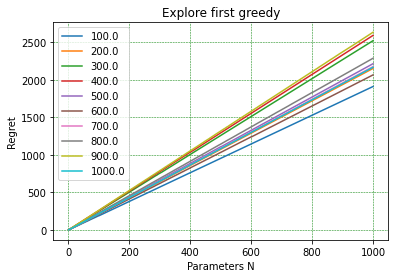

In [109]:

def main():

    #Repeat the algorithm to get average regret over 100 times
    Regret=np.zeros(1000) #Regret initialization
    iterations=10 
    E_parameter=np.linspace(100,1000,10) #Exploration parameter
    i=0
    j=0
    plt.figure("Greedy")
    plt.title("Explore first greedy")
    while(i<iterations): 
        
        while(j<10):  
            Regret_new=greedy(10,1000,E_parameter[i])
            Regret=np.add(Regret_new, Regret)
            j+=1
        Regret=Regret/10
        plt.plot(np.arange(1,1001),Regret) #Save all the regret to take average over 100 iterations
        print(i)
        print(E_parameter[i])
        Regret=np.zeros(1000)
        i+=1
        j=0
    
    plt.legend(E_parameter, loc='upper left')
    plt.xlabel("Parameters N")
    plt.ylabel("Regret")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
if __name__ == '__main__':
    main()